In [51]:
%matplotlib inline
import numpy as np
from scipy import stats
import pickle
import seaborn as sns
import os
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30., 10.]
PKL_OBJ_PATH = 'data/obj/'
os.system('mkdir -p {}'.format(PKL_OBJ_PATH));
TMP_PATH = 'data/tmp/'
FRAMES_PATH = 'data/frames/'
video_data = load_obj('video_data')

In [52]:
def save_obj(obj, name ):
    with open(PKL_OBJ_PATH+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(PKL_OBJ_PATH + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [60]:
def gte_mean(scores):
    mean = np.mean(scores)
    return [s if s >= mean else 0 for s in scores]

def lt_mean(scores):
    mean = np.mean(scores)
    return [0 if s > mean else s for s in scores]

def kezhang(idx):
    return video_data['bscores'][idx]

def gt_meanp2std(scores):
    mean = np.mean(scores)
    std = np.std(scores)
    return [s if s > mean+2*std else 0 for s in scores]

In [104]:
def plot_scores(idx, modifier=None, save=False, filename=None):
    video_name = video_data['video_names'][idx].replace(' ', '_')
    scores = list(video_data['scores'][idx]/np.max(video_data['scores'][idx]))
    x = list(range(len(scores)))
    
    if modifier is kezhang:
        y = modifier(idx)
    elif modifier is not None:
        y = modifier(scores)
    
    fig = plt.figure()
    plt.tick_params(labelsize=30)
    plt.plot([-1] + x + [len(scores)], [0.0] + scores + [0.0], color='red', linewidth=5.0)
    if modifier is not None:
        plt.bar([-1] + x + [len(y)], [0.0] + y + [0.0], width=1.0, color='red')
    
    if save:
        plt.savefig('graphics/' + filename)
        plt.close(fig)
    else:
        plt.show()

In [101]:
def save(idx, modifier=None):
    
    scores = video_data['scores'][idx]
    
    if modifier is not None:
        scores = modifier(scores)
    else:
        scores = video_data['bscores'][idx]

    video = video_data['video_names'][idx]
    video_name = video.replace(' ', '_') + '.mp4'
    os.system("mkdir -p {}".format(TMP_PATH))
    
    frames_path = '{}{}'.format(FRAMES_PATH, video_name)
    
    count = 1
    for i, score in enumerate(scores):
        if score == 1:
            os.system("cp {}/{}-frame-{:04d}.jpg {}/{}-frame-{:04d}.jpg".format(frames_path, video_name,i+1, TMP_PATH, video_name, count))
            count+=1
    os.system("mkdir -p summaries/{}".format(video_name))
    ffmpeg = "ffmpeg -r 30 -i {}/{}-frame-%04d.jpg -vcodec mpeg4 -y summaries/{}/{}.mp4".format(TMP_PATH, video_name, video_name, modifier.__name__ if modifier is not None else 'kezhang')
    os.system(ffmpeg)
    os.system("rm -rf {}".format(TMP_PATH))

def save_all_styles(idx, modifiers=[]):

    save(idx)
    for modifier in modifiers:
        save(idx, modifier)

def save_all_summaries(indexes, modifiers=[], subset=None):
        
    for idx in indexes:
        video_name = video_data['video_names'][idx]
        if subset is not None and video_name in subset:
            print(video_name)
            if '[NW]' not in video_name:
                save_all_styles(idx, modifiers)

styles = [greaterthan_mean,
          lowerthan_mean,
          mode]
subset = ['Air_Force_One',
          'Base jumping',
          'Cockpit_Landing',
          'Eiffel Tower',
          'Fire Domino',
          'Scuba',
          'Uncut_Evening_Flight',
          'Valparaiso_Downhill']
save_all_summaries(range(25), styles, subset=subset)

In [102]:
name2idx = {n:i for i,n in enumerate(video_data['video_names'])}

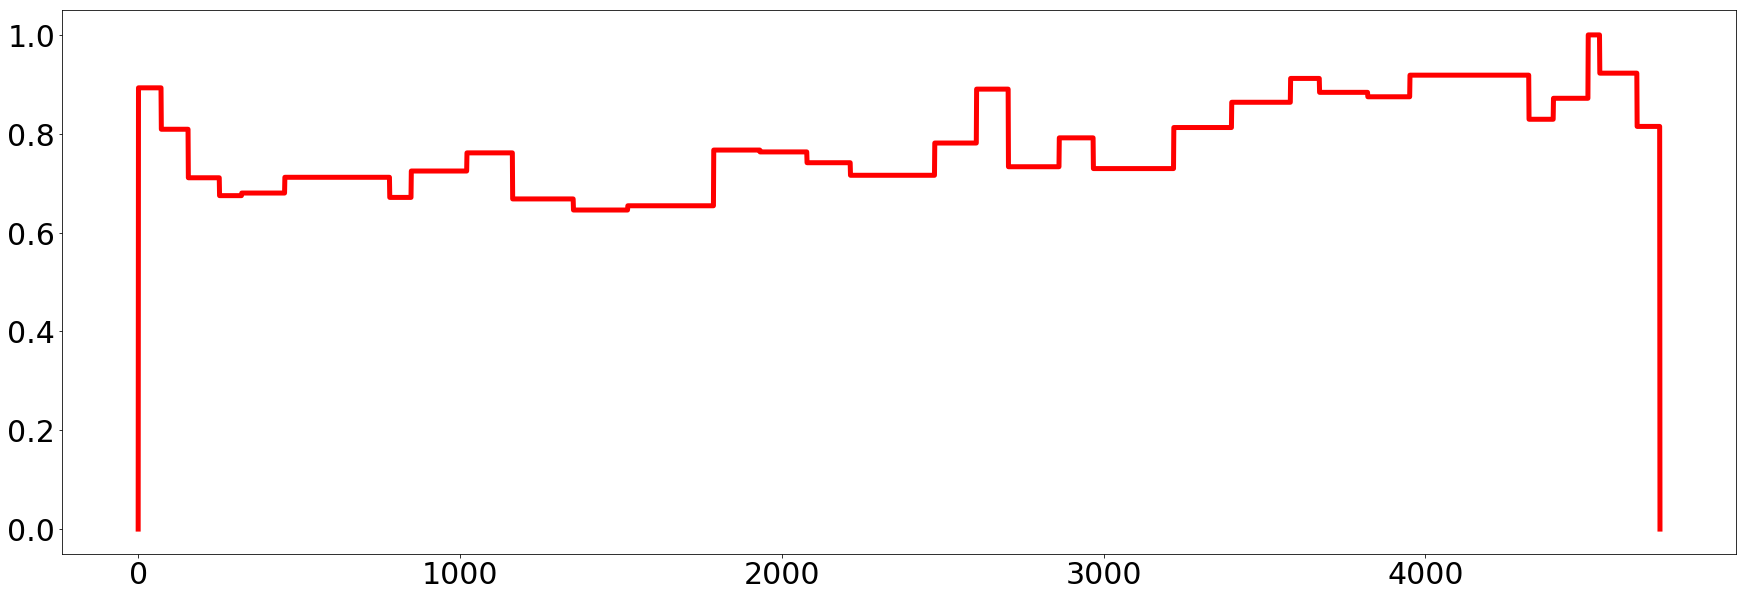

In [115]:
plot_scores(name2idx['Base jumping'], save=False, filename='Base Jumping')

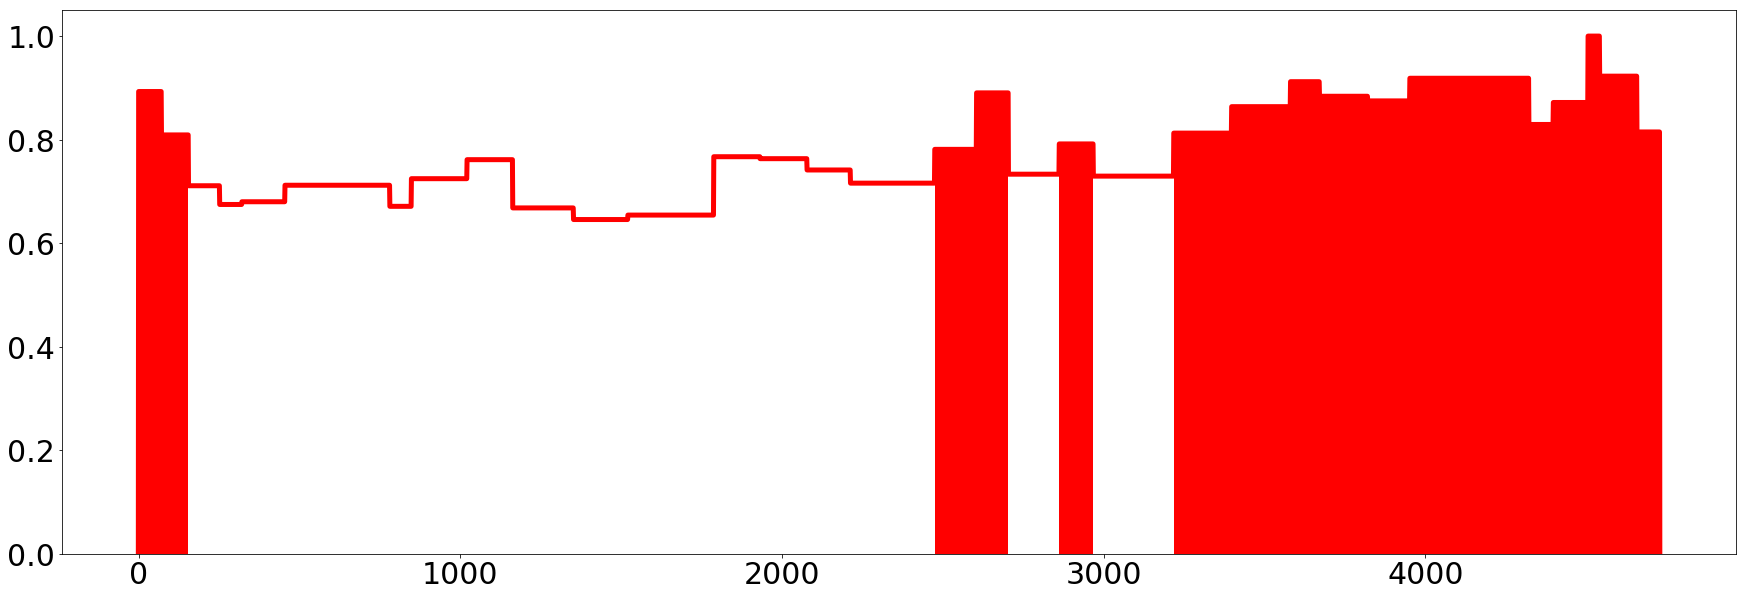

In [116]:
plot_scores(name2idx['Base jumping'], gte_mean, save=False, filename='Base Jumping')

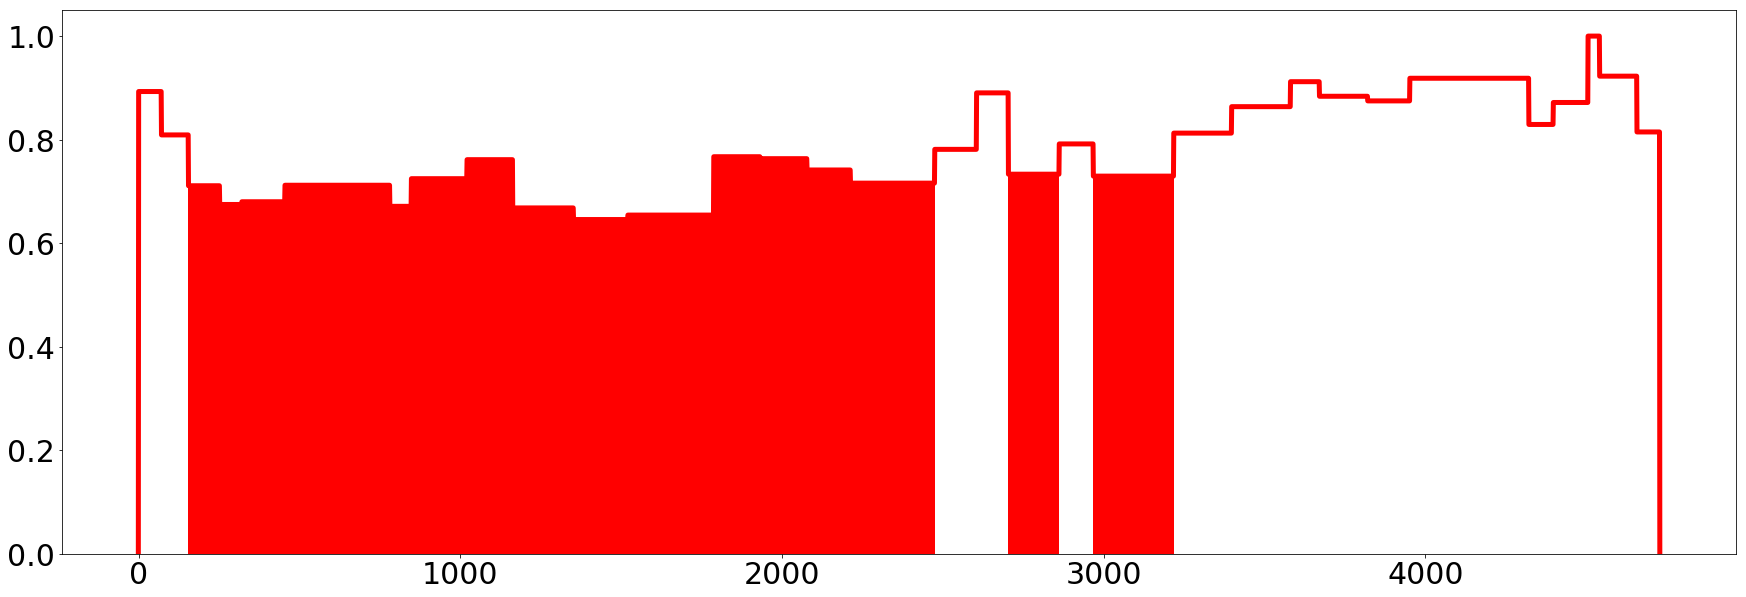

In [117]:
plot_scores(name2idx['Base jumping'], lt_mean, save=False, filename='Base Jumping')